# &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Assignment 8

#### Yogendra Singh  &emsp;  214161014 <br><br> M Shanmukh Rao &emsp;   214161004

<br><br><b>Q.1 Application of the Discriminant Functions in Classification of Normal and Shouted Speech using MFCC features. These features are extracted from speech samples of a number of speakers uttering a few sentences normally or by shouting. The features are divided into train-test splits and are made available in two csv files. You are tasked to learn a
discriminative model to classify normal and shouted speech. This example uses discriminative functions. The whole process is described as follows.
<br><br>
<b>Consider the .csv file “Train_file.csv” containing 86060 instances of 61-dimensional arrays. The first 60 dimensions of the array contain the feature values for a particular instance and the last dimension contains its label. The label can be either ’0’ or ‘1’.
<br><br>
<b>(a) Evaluate $\mu_{0}$, $\mu_{1}$, $C_{0}$, $C_{1}$ from instances in “Train_file.csv”.

In [2]:
import pandas as pd
import numpy as np

In [3]:
#loading the train data
train_df=pd.read_csv("Train_file.csv",header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-10.120651,2.515380,1.823152,1.508992,-1.719560,-1.894340,-1.105240,-1.882580,1.283309,-1.349106,...,0.028268,-0.163431,0.032981,0.041419,0.062175,-0.025429,0.072103,-0.054116,0.049799,1.0
1,-4.889809,-5.689037,-3.359693,-2.125163,0.261292,-1.499884,0.754239,-1.677804,0.495266,-1.082571,...,0.009443,-0.025915,-0.107059,-0.055360,0.010194,-0.097698,-0.105427,-0.088457,-0.021961,0.0
2,-1.694022,-5.086290,-4.164934,-2.412973,-4.749922,-0.730738,-0.726216,-2.307999,0.666796,0.516605,...,0.049961,-0.055671,0.001667,-0.203994,0.225937,0.233620,0.110080,0.036043,-0.200711,0.0
3,-4.241995,-5.011858,-3.345426,-3.906843,1.229525,1.224371,-0.399490,-1.617319,-0.427983,0.644910,...,-0.059464,0.055713,-0.002794,-0.028805,-0.081924,-0.095755,0.093118,-0.022315,0.148809,0.0
4,-3.101878,-6.134078,-3.250782,-3.051343,0.591492,0.893184,-1.925571,-0.913248,0.228131,-0.977734,...,0.128475,-0.208654,-0.075758,0.121429,-0.085190,0.034585,0.233586,0.027971,0.197148,1.0


In [4]:
#extracting the data points of class 0
train0=train_df[train_df[60] == 0.0]
train0.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
1,-4.889809,-5.689037,-3.359693,-2.125163,0.261292,-1.499884,0.754239,-1.677804,0.495266,-1.082571,...,0.009443,-0.025915,-0.107059,-0.055360,0.010194,-0.097698,-0.105427,-0.088457,-0.021961,0.0
2,-1.694022,-5.086290,-4.164934,-2.412973,-4.749922,-0.730738,-0.726216,-2.307999,0.666796,0.516605,...,0.049961,-0.055671,0.001667,-0.203994,0.225937,0.233620,0.110080,0.036043,-0.200711,0.0
3,-4.241995,-5.011858,-3.345426,-3.906843,1.229525,1.224371,-0.399490,-1.617319,-0.427983,0.644910,...,-0.059464,0.055713,-0.002794,-0.028805,-0.081924,-0.095755,0.093118,-0.022315,0.148809,0.0
6,-4.479826,-4.518239,-3.058471,-4.416631,-1.558622,3.709126,-2.329541,-0.756639,-0.263025,-0.164152,...,0.024278,0.017254,0.003800,0.013705,0.039691,0.010996,0.010633,0.005273,0.012212,0.0
8,-3.709391,-2.828423,-4.947695,-1.121487,-1.849937,-2.425730,-1.280792,-4.181747,-1.001612,-2.928351,...,-0.012405,-0.009941,-0.101306,0.001873,0.118850,-0.029416,-0.146173,-0.028022,-0.048070,0.0


In [5]:
#extracting the data points of class 1
train1=train_df[train_df[60] == 1.0]
train1.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-10.120651,2.515380,1.823152,1.508992,-1.719560,-1.894340,-1.105240,-1.882580,1.283309,-1.349106,...,0.028268,-0.163431,0.032981,0.041419,0.062175,-0.025429,0.072103,-0.054116,0.049799,1.0
4,-3.101878,-6.134078,-3.250782,-3.051343,0.591492,0.893184,-1.925571,-0.913248,0.228131,-0.977734,...,0.128475,-0.208654,-0.075758,0.121429,-0.085190,0.034585,0.233586,0.027971,0.197148,1.0
5,-4.988754,-0.978754,3.649473,-2.397396,-3.282061,-0.949053,-1.290025,-0.944254,-0.751182,-2.113737,...,-0.121876,0.076328,-0.078917,0.014181,0.002250,-0.028822,0.023502,-0.071034,-0.000491,1.0
7,1.306333,-1.131249,2.165623,2.345333,-2.019367,-3.511892,-3.253341,-0.405794,-0.726876,-1.785986,...,-0.049223,0.076499,0.004655,0.048780,0.025772,-0.024846,-0.032834,-0.029928,-0.037003,1.0
11,-2.900226,-2.575067,-2.403373,-4.622999,-2.899835,1.031539,-0.202237,0.012072,0.238534,-1.861531,...,0.000584,0.018954,-0.002766,-0.022175,-0.017973,-0.021590,-0.030829,-0.020546,-0.045072,1.0


In [6]:
#dropping the labels column
train0=train0.drop(train0.columns[[60]],axis=1)
train1=train1.drop(train1.columns[[60]],axis=1)

In [7]:
#Mean of class 0
m0 = train0.mean()
m0=np.array(m0)
m0=m0.reshape(60,1)
m0.shape

(60, 1)

In [8]:
#Mean of class 1
m1=train1.mean()
m1=np.array(m1)
m1=m1.reshape(60,1)
m1.shape

(60, 1)

In [9]:
#covariance matrix of both classes
C0=train0.cov()
C1=train1.cov()
C1.shape

(60, 60)

<br><br><b>Q1.(b) Construct parameters of the discriminant function with Gaussian assumption on instance distribution in classes.<br><br>
$$g(x) = ln{\frac{P(X1)}{P(X0)}}-\frac{1}{2}(\mu_{1}^{T}C_{1}^{-1}\mu_{1}-\mu_{0}^{T}C_{0}^{-1}\mu_{0})-\frac{1}{2}ln{\frac{|C_{1}|}{|C_{0}|}}+x^{T}(C_{1}^{-1}\mu_{1}-C_{0}^{-1}\mu_{0})-\frac{1}{2}x^{T}(C_{1}^{-1}-C_{0}^{-1})x$$<br><br>
The decision rule for classification of an unseen instance 𝑥 is given by its
label 𝑦(𝑥) defined as<br><br> 
𝑦(𝑥) = 1, 𝑔(𝑥) ≥ 0 <br>
       &emsp;&emsp;&emsp;0, 𝑔(𝑥) < 0


In [10]:
#evaluating the constant terms of g(x)
Px0=(train0.shape[0]/train_df.shape[0])
Px1=(train1.shape[0]/train_df.shape[0])

a=np.log(Px1/Px0)
b=-0.5*(np.dot(np.dot(m1.T,np.linalg.inv(C1)),m1)-(np.dot(np.dot(m0.T,np.linalg.inv(C0)),m0)))
c=-0.5*(np.log(np.linalg.det(C1)/np.linalg.det(C0)))
d=np.dot(np.linalg.inv(C1),m1)-np.dot(np.linalg.inv(C0),m0)
e=np.linalg.inv(C1)-np.linalg.inv(C0)

<br><br><b>(c) Read “Test_file.csv” consisting of 21516 instances of 61 dimensional arrays. For each array, the first 60 dimensions contain the feature values for the test data and the last dimension contains its actual label. Predict the label of each data instance from the testing set using the decision
rule mentioned above and compare the predicted and actual labels.
Report the class-wise ($\rho_{0}$ and $\rho_{1}$) and overall $(\rho)$ accuracy measures.<br><br>
    $$\rho_{0}=\frac{𝑁𝑜. 𝑜𝑓 𝐶𝑜𝑟𝑟𝑒𝑐𝑡𝑙𝑦 𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑒𝑑 𝐼𝑛𝑠𝑡𝑎𝑛𝑐𝑒𝑠 𝑖𝑛 𝐶𝑙𝑎𝑠𝑠 "0"}{𝑇𝑜𝑡𝑎𝑙 𝑁𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑃𝑜𝑖𝑛𝑡𝑠 𝑖𝑛 𝐶𝑙𝑎𝑠𝑠 "0"}$$<br>
    $$\rho_{1}=\frac{𝑁𝑜. 𝑜𝑓 𝐶𝑜𝑟𝑟𝑒𝑐𝑡𝑙𝑦 𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑒𝑑 𝐼𝑛𝑠𝑡𝑎𝑛𝑐𝑒𝑠 𝑖𝑛 𝐶𝑙𝑎𝑠𝑠 "1"}{𝑇𝑜𝑡𝑎𝑙 𝑁𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑃𝑜𝑖𝑛𝑡𝑠 𝑖𝑛 𝐶𝑙𝑎𝑠𝑠 "1"}$$<br>
     $$\rho=\frac{𝑇𝑜𝑡𝑎𝑙 𝑁𝑜. 𝑜𝑓 𝐶𝑜𝑟𝑟𝑒𝑐𝑡𝑙𝑦 𝐶𝑙𝑎𝑠𝑠𝑖𝑓𝑖𝑒𝑑 𝐼𝑛𝑠𝑡𝑎𝑛𝑐𝑒s}{𝑇𝑜𝑡𝑎𝑙 𝑁𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑇𝑒𝑠𝑡 𝐼𝑛𝑠𝑡𝑎𝑛𝑐𝑒s}$$

In [11]:
#loaing the test data
test_df=pd.read_csv("Test_file.csv",header=None)
Y=test_df[60]
X=test_df.drop(test_df.columns[[60]],axis=1)
g=[]

#computing the value of the discriminant function for each test data
for i in range(len(X)):
    x=X.iloc[i,:].to_numpy().reshape(1,60)
    g.append(a+b[0,0]+c+np.dot(x,d)-(0.5*(np.dot(np.dot(x,e),x.T))))
g=np.array(g)
g=g.reshape(len(g),1)
g.shape

(21516, 1)

In [12]:
#computing the values of rho, rho0, rho1 based on the decision rule
y=[]
for i in range(len(g)):
    if g[i,0]>=0:
        y.append(1)
    else:
        y.append(0)
y=np.array(y)
y=y.reshape(len(y),1)
Y=Y.to_numpy().reshape(len(Y),1)

p=(sum(Y==y)/len(Y))
p=p[0]

idx0 = [i for i,value in enumerate(Y[:,0]) if Y[i,0] == 0]
idx1 = [i for i,value in enumerate(Y[:,0]) if Y[i,0] == 1]

p0=sum(Y[idx0,0]==y[idx0,0])/len(idx0)
p1=sum(Y[idx1,0]==y[idx1,0])/len(idx1)

print("rho: ",p,"\nrho0: ",p0,"\nrho1: ",p1)

rho:  0.9054656999442275 
rho0:  0.859412974387736 
rho1:  0.951007579959327


In [13]:
len(idx0)

10698

In [14]:
len(idx1)

10818

<br><br><b>Q2. Application of Linear Discriminant Analysis (LDA) in understanding the separability in the dataset of MFCC features used for classifying Shouted and Normal Speech. The two files MFCC_N.npy and MFCC_S.npy
respectively store the features of normal and shouted speech.<br><br>
Q2.a) Load the two datasets MFCC_N.npy and MFCC_S.npy into arrays N
and S respectively. Use the python function np.load( filename ).


In [12]:
N=np.load('MFCC_N.npy')
S=np.load('MFCC_S.npy')

df_N = pd.DataFrame(N)
df_S = pd.DataFrame(S)

<br><b>Q2.b) Compute centroids $(𝑚_{n} , 𝑚_{s})$ and covariance matrices $(C_{n} , C_{s})$ of both arrays.

In [13]:
#Computing the mean
mN = df_N.mean()
mS = df_S.mean()

mN=np.array(mN)
mN=mN.reshape(1,60)

mS=np.array(mS)
mS=mS.reshape(1,60)

#covariance matrices
Cn=np.cov((df_N).T)
Cs=np.cov((df_S).T)
Cs.shape

(60, 60)

<br><b>Q2.c) Compute the optimal direction vector $\hat{\omega}$ (unit vector) for LDA.

In [14]:
#mean difference
m = mN-mS

#within class scatter
Sw = Cn + Cs

u = np.dot(np.linalg.inv(Sw),m.T)
#optimal direction unit vector
w = u/np.linalg.norm(u)

<br><br><b>Q2.d) Project the vector data in arrays N and S to generate the respective array of scalars zN and zS.

In [15]:
#projecting along the optimal vector
zN = np.dot(df_N,w)
zS = np.dot(df_S,w)
zS.shape

(5000, 1)

<br><br><b>Q2.e)Plot the normalized histograms of zN and zS in two different colors(red and blue).

In [18]:
import matplotlib.pyplot as plt
plt.hist(zN,label='N',color='r',ec='w',density=True)
plt.hist(zS,label='S',color='b',ec='w',density=True)
plt.legend()
plt.show()

NameError: name 'zN' is not defined

<br><br><b>Q3.  Application of K-Means Clustering in image segmentation. Consider the R-G-B values of each pixel of the input image as 3-dimensional
feature vector. Initialize K-Means through data labels or cluster
centroids. Perform K-means iterations till convergence and report the K
cluster centroids. Revisit the Image and replace each pixel color (R-G-B)
with the nearest cluster centroid (rounded) color values. Repeat this
experiment with different values of K and visualize the results.

In [15]:
import random
import math
import matplotlib.image as mpimg

In [16]:
def KMeans(k,img,maxIter):
    
    #reshaping the image
    img1=img.reshape(img.shape[0]*img.shape[1],img.shape[2])
    
    #matrix to store the centroids
    c=np.zeros((k,img.shape[2]))
    
    #matrix to store the distances and index of the nearest centroid for each data point
    d=np.zeros((img.shape[0]*img.shape[1],k+1))
    
    #random initialisation of the centroids
    for i in range(k):
        for j in range(img.shape[2]):
            c[i][j]=random.randint(0,255)
    
    #calculating the distances
    for i in range(img.shape[0]*img.shape[1]):
        idx=0
        v=999999
        for j in range(k):
            d[i][j] = math.dist(img1[i,:],c[j,:])
            if(d[i][j]<v):
                v=d[i][j]
                idx=j
        d[i][k]=idx
    
    #k-means algo
    for i in range (maxIter):
        for j in range(k):
            ind=[]
            for l in range(img.shape[0]*img.shape[1]):
                if d[l][k]==j:
                    ind.append(l)
            cl=np.copy(img1[ind,:])
            c[j,:]=np.round(np.copy(np.average(cl,axis=0)))
    
        for n in range(img.shape[0]*img.shape[1]):
            idx=0
            v=9999999
            for o in range(k):
                d[n][o] = math.dist(img1[n,:],c[o,:])
                if(d[n][o]<v):
                    v=d[n][o]
                    idx=o
            d[n][k]=idx
            
    for i in range(k):
        for j in range(img.shape[0]*img.shape[1]):
            if d[j][k]==i:
                img1[j,:]=np.copy(c[i,:])
    img2=np.copy(img1.reshape(img.shape[0],img.shape[1],img.shape[2]))
    
    return img2,c

<br><b>$k=3,maxIter=6$

Original Image


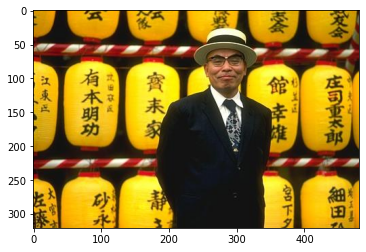

C:\Users\Shanmukh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Shanmukh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


Reconstructed image for k= 10


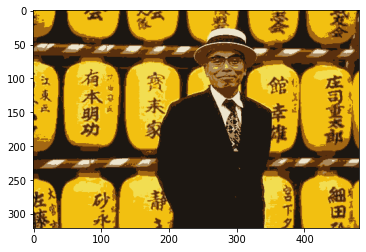

Centroids:

[[237. 229. 206.]
 [ nan  nan  nan]
 [242. 192.  17.]
 [169. 136.  92.]
 [ nan  nan  nan]
 [ nan  nan  nan]
 [ 28.  23.  18.]
 [163. 103.  19.]
 [242. 221.  81.]
 [ 90.  48.  14.]]


In [19]:
img = mpimg.imread('KMeans_Seg_Input_Image_4.jpg')

#plot
print("Original Image")
imgplot = plt.imshow(img)
plt.show()

k=10
maxIter=6
img2,c1=KMeans(k,img,maxIter)

print("Reconstructed image for k=",k)
imgplot = plt.imshow(img2)
plt.show()

print("Centroids:\n")
print(c1)

<br><b>$k=4,maxIter=6$

Original Image


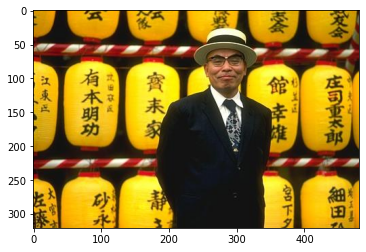

Reconstructed image for k= 4


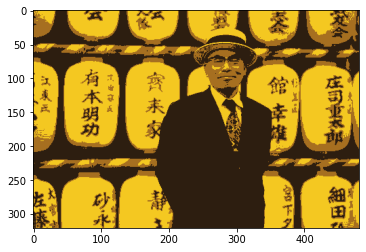

Centroids:

[[ 45.  30.  16.]
 [166. 111.  32.]
 [244. 200.  33.]
 [ nan  nan  nan]]


In [25]:
img = mpimg.imread('KMeans_Seg_Input_Image_4.jpg')

#plot
print("Original Image")
imgplot = plt.imshow(img)
plt.show()

k=4
maxIter=6
img2,c1=KMeans(k,img,maxIter)

print("Reconstructed image for k=",k)
imgplot = plt.imshow(img2)
plt.show()

print("Centroids:\n")
print(c1)

<br><b>$k=6,maxIter=6$

Original Image


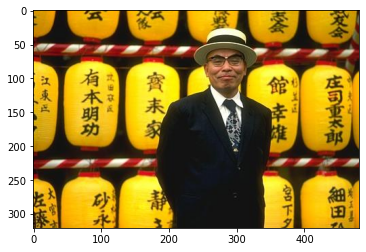

Reconstructed image for k= 6


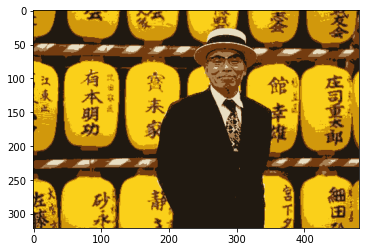

Centroids:

[[232. 222. 195.]
 [116.  60.  16.]
 [ 32.  25.  17.]
 [250. 208.  26.]
 [209. 152.  12.]
 [167. 127.  83.]]


In [26]:
img = mpimg.imread('KMeans_Seg_Input_Image_4.jpg')

#plot
print("Original Image")
imgplot = plt.imshow(img)
plt.show()

k=6
maxIter=6
img2,c1=KMeans(k,img,maxIter)

print("Reconstructed image for k=",k)
imgplot = plt.imshow(img2)
plt.show()

print("Centroids:\n")
print(c1)